In [14]:
import os
import sys
sys.path.append('../')
from utils import camb_clfile
import matplotlib.pyplot as plt
import curvedsky as cs
import healpy as hp

In [2]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG

In [15]:
def alms2QU(alms,lmax,nside):
    return cs.utils.hp_alm2map_spin(nside, lmax, lmax, 2, alms[1], alms[2])
def cinv_EB(maskpath,alms,beam,):
    Bl = np.reshape(self.beam,(1,self.lmax+1))
    QU = self.get_sim(idx)
    E,B = cs.cninv.cnfilter_freq(2,1,nside,lmax,self.cl_len[1:3,:],
                                 Bl,invN,QU,chn=1,itns=[1000],eps=[1e-5],
                                filter=filt,ro=10)

In [3]:
nside = 512
cl_len = camb_clfile('/global/cscratch1/sd/lonappan/S4BIRD/CAMB/BBSims_lensed_dls.dat')

In [67]:
outfolder = os.path.join(os.environ['SCRATCH'],"MASK_TEST")
infolder = '/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/'
dnside = 512
maskpath8 = '/project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_binary.fits'
maskpath7 = '/project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p7_binary.fits'
maskpath6 = '/project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p6_binary.fits'
fwhm = 30
fg_dir = '/global/cscratch1/sd/lonappan/S4BIRD/FG'
fg_str = "s0d0"
table = "LITEBIRD_V1"
cl_len = '/global/cscratch1/sd/lonappan/S4BIRD/CAMB/BBSims_lensed_dls.dat'
sim8 = SimExperimentFG(infolder,outfolder,dnside,maskpath8,fwhm,fg_dir,fg_str,table,cl_len)
sim7 = SimExperimentFG(infolder,outfolder,dnside,maskpath7,fwhm,fg_dir,fg_str,table,cl_len)
sim6 = SimExperimentFG(infolder,outfolder,dnside,maskpath6,fwhm,fg_dir,fg_str,table,cl_len)

using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/MASK_TEST


using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/MASK_TEST


using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/MASK_TEST


In [68]:
noFG_alms8 = sim8.get_noFG_alms(0)
FG_alms8 = sim8.get_comp_sep_alm(0)
FG_alms7 = sim7.get_comp_sep_alm(0)
FG_alms6 = sim6.get_comp_sep_alm(0)

Making alms: 100%|██████████| 15/15 [16:43<00:00, 66.90s/Freq]


In [69]:
noFG_cinv = sim.get_cinv_sim(0,True)
FG_cinv8 = sim8.get_cinv_sim(0)
FG_cinv7 = sim7.get_cinv_sim(0)
FG_cinv6 = sim6.get_cinv_sim(0)

/tmp/ipykernel_51988/1291343859.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/sim.cl_len[2,:])


(100000000000000000, 10000000000000000000)

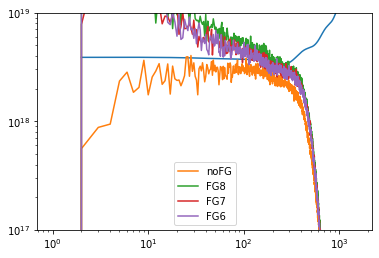

In [71]:
plt.loglog(1/sim.cl_len[2,:])
plt.loglog(cs.utils.alm2cl(sim8.lmax,noFG_cinv[1])/sim8.fsky,label='noFG')
plt.loglog(cs.utils.alm2cl(sim8.lmax,FG_cinv8[1])/sim8.fsky,label='FG8')
plt.loglog(cs.utils.alm2cl(sim7.lmax,FG_cinv7[1])/sim7.fsky,label='FG7')
plt.loglog(cs.utils.alm2cl(sim6.lmax,FG_cinv6[1])/sim6.fsky,label='FG6')
plt.legend()
plt.ylim(10**17,10**19)

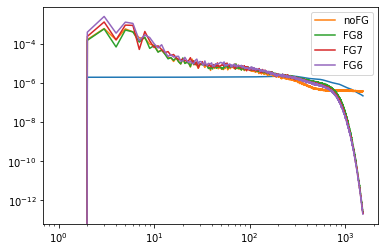

In [77]:
plt.loglog(sim.cl_len[2,:]*sim8.Tcmb**2)
plt.loglog(hp.alm2cl(noFG_alms8[2])/sim8.fsky,label='noFG')
plt.loglog(hp.alm2cl(FG_alms8[2])/sim8.fsky,label='FG8')
plt.loglog(hp.alm2cl(FG_alms7[2])/sim7.fsky,label='FG7')
plt.loglog(hp.alm2cl(FG_alms6[2])/sim6.fsky,label='FG6')
plt.legend()

In [ ]:
plt.loglog(cs.utils.alm2cl(FF))